In [16]:
import os
import matplotlib.pyplot as plt
import numpy as np
import torch

In [17]:
from matplotlib import font_manager
 
# for font in font_manager.fontManager.ttflist:
    # 查看字体名以及对应的字体文件名
    # print(font.name, '-', font.fname)

plt.rcParams["font.sans-serif"] = "DejaVu Sans"

In [18]:
def load_and_info(_id):
    # _id = 'tiny-on-wm'
    metrics:dict = torch.load(f"results/{_id}/metrics.pth")
    if os.path.exists(f"results/{_id}/losses.pth"):
        losses:dict = torch.load(f"results/{_id}/losses.pth")
    else:
        losses = {}
        print("No losses found")
        
    print("metrics keys:",metrics.keys())
    # for k,v in metrics.items():
        # print(k, type(v))
        
    print("losses keys:",losses.keys())
    # for k,v in losses.items():
        # print(k, type(v))
        
    return metrics, losses

In [19]:
def moving_average(x, w):
    x_smoothed = []
    for i in range(len(x)):
        if i < w:
            x_smoothed.append(np.mean(x[:i]))
        else:
            x_smoothed.append(np.mean(x[i-w:i]))
    return x_smoothed

In [20]:
def plot_metrics(metrics):
    fig = plt.figure(figsize=(6,4))

    plt.subplot(2,1,1)
    plt.plot(metrics['steps'],moving_average(metrics['rewards'],10),alpha=0.5)
    plt.grid()
    plt.xlabel('step')
    plt.ylabel('reward')

    plt.subplot(2,1,2)
    plt.plot(metrics['steps'],moving_average(metrics['Qs'],10),alpha=0.5)
    plt.grid()
    plt.xlabel('step')
    plt.ylabel('Q')

    plt.tight_layout()
    plt.show()


In [21]:
def plot_losses(losses):
    fig = plt.figure(figsize=(12,12))

    policy_loss_names = []
    wm_loss_names = []

    for key, value in losses.items():
        if key == 'steps' or key == 'wm_steps':
            continue
        if len(value) == len(losses['steps']):
            policy_loss_names.append(key)
        # if 'wm_steps' in losses.keys() and len(value) == len(losses['wm_steps']):
        else:
            wm_loss_names.append(key)
            # print(len(value),value[0],value[-1])
            
    policy_loss_names.sort()
    wm_loss_names.sort()

    ax_idx = 0
    for name in policy_loss_names:
        ax_idx += 1
        plt.subplot(5,5,ax_idx)    
        plt.plot(losses['steps'],losses[name],alpha=0.9,color=np.random.rand(3,))
        plt.grid()
        plt.xlabel('step')
        plt.ylabel(name)

    for name in wm_loss_names:
        ax_idx += 1
        plt.subplot(5,5,ax_idx)
        if isinstance(losses[name][0],list) or isinstance(losses[name][0],np.ndarray):
            value = [np.mean(x) for x in losses[name]]
        elif isinstance(losses[name][0],float) or isinstance(losses[name][0],int):
            value = losses[name]
        else:
            print(name,'is',type(losses[name][0]))
        wmstep = losses['wm_steps'][:len(value)]
        plt.plot(wmstep,value,alpha=0.9,color=np.random.rand(3,))
        plt.grid()
        plt.xlabel('wm_step')
        plt.ylabel(name)
        
    plt.tight_layout()
    plt.show()

In [25]:
metrics, losses = load_and_info('re-default-test')

metrics keys: dict_keys(['steps', 'rewards', 'Qs', 'best_avg_reward'])
losses keys: dict_keys(['loss', 'weights', 'log_ps_a'])


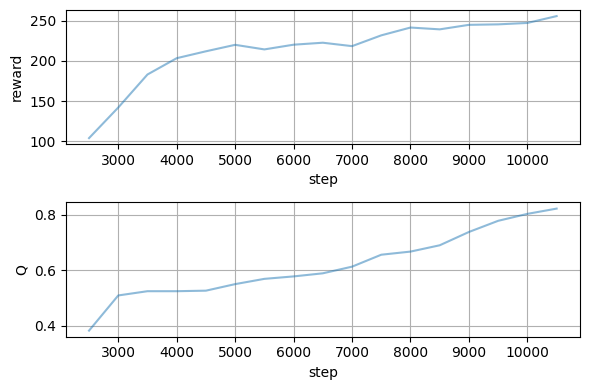

In [26]:
plot_metrics(metrics)

In [27]:
plot_losses(losses)

KeyError: 'steps'

<Figure size 1200x1200 with 0 Axes>